In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
# from config import api_key
from pprint import pprint
import requests
import math

In [3]:
netflix_df=pd.read_csv("Resources/cleaned_netflix_data.csv")
netflix_df.head()

,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,...,production_countries,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance
0,2022-10-30,Films (English),1,68310000,1,the good nurse,movie,An infamous caregiver is implicated in the dea...,2022,R,...,United States,tt4273800,7.1,204.0,1,0,0,0,1,0
1,2022-10-30,Films (English),2,41950000,2,the school for good and evil,movie,Best friends Sophie and Agatha find themselves...,2022,PG-13,...,United States,tt2935622,5.8,18952.0,1,1,1,0,0,0
2,2022-10-30,Films (English),3,9170000,2,the stranger,SHOW,A web of secrets sends family man Adam Price o...,2020,TV-MA,...,United Kingdom,tt9698480,7.3,48298.0,1,0,0,0,1,0
3,2022-10-30,Films (English),4,8890000,1,wild is the wind,movie,An immigrant Nevada rancher brings a woman fro...,1957,Not Rated,...,United States,tt0051193,6.7,1027.0,1,0,0,0,0,0
4,2022-10-30,Films (English),5,8170000,3,the curse of bridge hollow,movie,"A teenage girl, who accidentally releases an a...",2022,TV-14,...,United States,tt15289240,NaN,4085.0,0,1,0,1,0,0


In [4]:
genre = netflix_df['genres']
netflix_df['genres'] = netflix_df['genres'].str.lower()
netflix_df['genres'] = netflix_df['genres'].str.replace('[', '').str.replace("\'","").str.replace(']', '')
# netflix_df[“genres”] = netflix_df[“genres”].str.replace(“[”, “”).str.replace(“\’“, “”).str.replace(“]”, “”)
print(netflix_df['genres'])





0                                 biography, crime, drama
1                                   action, comedy, drama
2                                  thriller, crime, drama
3                                                   drama
4                               adventure, comedy, family
                              ...                        
2064                               thriller, drama, crime
2065                               thriller, drama, crime
2066                               thriller, drama, crime
2067                               drama, thriller, scifi
2068    animation, action, scifi, drama, fantasy, thri...
Name: genres, Length: 2069, dtype: object


C:\Users\yaber\AppData\Local\Temp\ipykernel_18560\3415075009.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  netflix_df['genres'] = netflix_df['genres'].str.replace('[', '').str.replace("\'","").str.replace(']', '')


In [5]:
netflix_df.head()

,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,...,production_countries,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance
0,2022-10-30,Films (English),1,68310000,1,the good nurse,movie,An infamous caregiver is implicated in the dea...,2022,R,...,United States,tt4273800,7.1,204.0,1,0,0,0,1,0
1,2022-10-30,Films (English),2,41950000,2,the school for good and evil,movie,Best friends Sophie and Agatha find themselves...,2022,PG-13,...,United States,tt2935622,5.8,18952.0,1,1,1,0,0,0
2,2022-10-30,Films (English),3,9170000,2,the stranger,SHOW,A web of secrets sends family man Adam Price o...,2020,TV-MA,...,United Kingdom,tt9698480,7.3,48298.0,1,0,0,0,1,0
3,2022-10-30,Films (English),4,8890000,1,wild is the wind,movie,An immigrant Nevada rancher brings a woman fro...,1957,Not Rated,...,United States,tt0051193,6.7,1027.0,1,0,0,0,0,0
4,2022-10-30,Films (English),5,8170000,3,the curse of bridge hollow,movie,"A teenage girl, who accidentally releases an a...",2022,TV-14,...,United States,tt15289240,NaN,4085.0,0,1,0,1,0,0


In [6]:
# bio_counter = 0

# for i in netflix_ky['genres']:
#     if(i in 'biography'):
#         bio_counter+=1
# bio_counter

In [7]:
# genre_summary = pd.DataFrame(netflix_df,columns=['genres']).value_counts().reset_index().rename(columns={0:'genre count'})
# genre_summary

In [8]:
# genre_summary = netflix_df['genres'].str.split(',', expand=True)
# genre_summary.columns = ['genres'+str(i) for i in genre_summary.columns]

# genre_summary

In [9]:
# genre_sum=pd.DataFrame(genre_summary)
# genre_sum

In [10]:
# genre_breakdown = pd.DataFrame(genre_summary,columns=['genres0']).value_counts().reset_index().rename(columns={0:'Genre Count 1'})
# genre_breakdown

In [11]:
# genre_breakdown = pd.DataFrame(genre_summary,columns=['genres0']).value_counts().reset_index().rename(columns={0:'Genre Count 1'})
# genre_breakdown2 = pd.DataFrame(genre_summary,columns=['genres1']).value_counts().reset_index().rename(columns={0:'Genre Count 2'})
# genre_breakdown2

In [12]:
netflix_df['drama'] = netflix_df['genres'].str.contains('drama').astype(int)
netflix_df['comedy'] = netflix_df['genres'].str.contains('comedy').astype(int)
netflix_df['action'] = netflix_df['genres'].str.contains('action').astype(int)
netflix_df['family'] = netflix_df['genres'].str.contains('family').astype(int)
netflix_df['crime'] = netflix_df['genres'].str.contains('crime').astype(int)
netflix_df['romance'] = netflix_df['genres'].str.contains('romance').astype(int)

In [49]:
netflix_df


,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,...,production_countries,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance
0,2022-10-30,Films (English),1,68310000,1,the good nurse,movie,An infamous caregiver is implicated in the dea...,2022,R,...,United States,tt4273800,7.1,204.0,1,0,0,0,1,0
1,2022-10-30,Films (English),2,41950000,2,the school for good and evil,movie,Best friends Sophie and Agatha find themselves...,2022,PG-13,...,United States,tt2935622,5.8,18952.0,1,1,1,0,0,0
2,2022-10-30,Films (English),3,9170000,2,the stranger,SHOW,A web of secrets sends family man Adam Price o...,2020,TV-MA,...,United Kingdom,tt9698480,7.3,48298.0,1,0,0,0,1,0
3,2022-10-30,Films (English),4,8890000,1,wild is the wind,movie,An immigrant Nevada rancher brings a woman fro...,1957,Not Rated,...,United States,tt0051193,6.7,1027.0,1,0,0,0,0,0
4,2022-10-30,Films (English),5,8170000,3,the curse of bridge hollow,movie,"A teenage girl, who accidentally releases an a...",2022,TV-14,...,United States,tt15289240,NaN,4085.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,2021-07-04,TV (Non-English),6,10530000,1,elite,SHOW,When three working class kids enroll in the mo...,2018,TV-MA,...,Spain,tt7134908,7.4,75337.0,1,0,0,0,1,0
2065,2021-07-04,TV (Non-English),7,10200000,1,elite,SHOW,When three working class kids enroll in the mo...,2018,TV-MA,...,Spain,tt7134908,7.4,75337.0,1,0,0,0,1,0
2066,2021-07-04,TV (Non-English),8,10140000,1,elite,SHOW,When three working class kids enroll in the mo...,2018,TV-MA,...,Spain,tt7134908,7.4,75337.0,1,0,0,0,1,0
2067,2021-07-04,TV (Non-English),9,9190000,1,katla,SHOW,"A year after a subglacial volcano erupts, myst...",2021,TV-MA,...,Iceland,tt11102190,7.0,13472.0,1,0,0,0,0,0


In [14]:
# # netflix_df["production_countries"].unique()
# netflix_df["production_countries"] = netflix_df["production_countries"].str.replace("[", "").str.replace("\'", "").str.replace("]", "")("]", "")

# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("US","United States")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AU","Australia")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("GB","United Kingdom")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CA","Canada")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("JP","Japan")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("KR","South Korea")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ES","Spain")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ES","Spain")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CZ","Czech Republic")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("MX","Mexico")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IT","Italy")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("LU","Luxembourg")    
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IN","India")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("PL","Poland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("DE","Germany")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BE","Belgium")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("TR","Turkey")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ZA","South Africa")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CL","Chile")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NG","Nigeria")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("KN","Saint Kitts and Nevis")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CO","Columbia")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BG","Bulgaria")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("FR","France")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AR","Argentina")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AT","Austria")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BR","Brazil")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("QA","Qatar")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CH","Switzerland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("HU","Hungary")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("PE","Peru")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("DK","Denmark")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("LT","Lithuania")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("GR","Greece")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IE","Ireland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IL","Israel")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IS","Iceland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("JO","Jordan")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NL","Netherlands")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("HK","Hong Kong")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NZ","New Zealand")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("SE","Sweden")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("SG","Singaport")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("RO","Romania")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("TH","Thailand")

# prod_cntry = netflix_df["production_countries"]
# prod_cntry.unique()

In [15]:
eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (English)"]
eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (English)"]
non_eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (Non-English)"]
non_eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (Non-English)"]

# Count all:
print(f"English Films:",eng_film_df["Show_title"].nunique())
print(f"English Show:",eng_show_df["Show_title"].nunique())
print(f"Non-English Films:",non_eng_film_df["Show_title"].nunique())
print(f"Non-English Show:",non_eng_show_df["Show_title"].nunique())
# Not a lot of Non-english films by comparison.
print(f"total unique shows:",eng_film_df["Show_title"].nunique() + eng_show_df["Show_title"].nunique() + 
                            non_eng_film_df["Show_title"].nunique()+non_eng_show_df["Show_title"].nunique())

English Films: 263
English Show: 152
Non-English Films: 92
Non-English Show: 139
total unique shows: 646


In [16]:
eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (English)"]
eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (English)"]
non_eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (Non-English)"]
non_eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (Non-English)"]

In [17]:
# eng_film_df
non_eng_film_df.head()

,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,...,production_countries,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance
10,2022-10-30,Films (Non-English),1,31500000,1,all quiet on the western front,movie,"A German youth eagerly enters World War I, but...",1930,Passed,...,United States,tt0020629,8.1,61923.0,1,0,0,0,0,0
11,2022-10-30,Films (Non-English),3,15900000,2,20th century girl,movie,"In 1999, a teen with a heart of gold begins ke...",2022,TV-PG,...,South Korea,tt15340724,7.3,1183.0,1,0,0,0,0,1
12,2022-10-30,Films (Non-English),5,10470000,1,hellhole,movie,"In 1987 Poland, a police officer investigating...",2022,TV-MA,...,Poland,tt19724142,5.6,2465.0,0,0,0,0,0,0
13,2022-10-30,Films (Non-English),9,2290000,8,rurouni kenshin: the beginning,MOVIE,"Before he was a protector, Kenshin was a fears...",2021,R,...,Japan,tt11991748,7.4,8273.0,1,0,1,0,0,0
14,2022-10-30,Films (Non-English),10,1990000,4,laal singh chaddha,movie,"Laal Singh Chaddha, a simple man whose extraor...",2022,PG-13,...,India,tt10028196,5.4,169172.0,1,1,0,0,0,1


In [70]:
import matplotlib.pyplot as plt


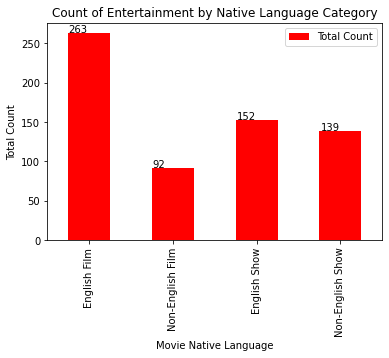

In [74]:
movie_show_breakdown = pd.DataFrame({'Movie Native Language':['English Film', 'Non-English Film', 'English Show','Non-English Show'], 'Total Count':[263, 92, 152,139]})
ax=movie_show_breakdown.plot.bar(x='Movie Native Language', y='Total Count',color='r')
plt.title("Count of Entertainment by Native Language Category")
plt.ylabel("Total Count")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


In [18]:
observed_film = pd.Series([non_eng_film_df['drama'].sum(),
non_eng_film_df['comedy'].sum(),
non_eng_film_df['action'].sum(),
non_eng_film_df['family'].sum(),
non_eng_film_df['crime'].sum(),
non_eng_film_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

observed_film

drama      147
comedy      76
action      55
family      11
crime       41
romance     51
dtype: int64

In [19]:
expected_film = pd.Series([eng_film_df['drama'].sum(),
eng_film_df['comedy'].sum(),
eng_film_df['action'].sum(),
eng_film_df['family'].sum(),
eng_film_df['crime'].sum(),
eng_film_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

expected_film

drama      275
comedy     276
action     238
family      73
crime      126
romance     90
dtype: int64

In [20]:
film_df = pd.DataFrame([observed_film]).T
film_df

,0
drama,147
comedy,76
action,55
family,11
crime,41
romance,51


In [21]:
film_df[1] = expected_film
film_df

,0,1
drama,147,275
comedy,76,276
action,55,238
family,11,73
crime,41,126
romance,51,90


In [22]:
film_df.columns = ["Non-English Films", "English Films"]
film_df

,Non-English Films,English Films
drama,147,275
comedy,76,276
action,55,238
family,11,73
crime,41,126
romance,51,90


In [23]:
critical_value_film = stats.chi2.ppf(q = 0.95, df = 5)
critical_value_film

11.070497693516351

In [24]:
stats.chisquare(film_df['Non-English Films'], film_df['English Films'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
1.8293963254593175

In [25]:
# crosstab_film=pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

NameError: name 'index' is not defined

In [26]:
# Since the chi square value of xxx exceeds the critical value of 11.07, we conclude that the results are statistically significant.


In [27]:
observed_film2 = pd.Series([non_eng_show_df['drama'].sum(),
non_eng_show_df['comedy'].sum(),
non_eng_show_df['action'].sum(),
non_eng_show_df['family'].sum(),
non_eng_show_df['crime'].sum(),
non_eng_show_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

observed_film2

drama      556
comedy     154
action     163
family      42
crime      160
romance    162
dtype: int64

In [28]:
expected_film2 = pd.Series([eng_show_df['drama'].sum(),
eng_show_df['comedy'].sum(),
eng_show_df['action'].sum(),
eng_show_df['family'].sum(),
eng_show_df['crime'].sum(),
eng_show_df['romance'].sum()],
 index=["drama","comedy", "action",'family','crime','romance'])

expected_film2

drama      543
comedy     146
action     129
family      46
crime      187
romance    119
dtype: int64

In [29]:
film_df2 = pd.DataFrame([observed_film2]).T
film_df2

,0
drama,556
comedy,154
action,163
family,42
crime,160
romance,162


In [30]:
film_df2[1] = expected_film2
film_df2

,0,1
drama,556,543
comedy,154,146
action,163,129
family,42,46
crime,160,187
romance,162,119


In [31]:
film_df2.columns = ["Non-English Shows", "English Shows"]
film_df2

,Non-English Shows,English Shows
drama,556,543
comedy,154,146
action,163,129
family,42,46
crime,160,187
romance,162,119


In [32]:
critical_value_film = stats.chi2.ppf(q = 0.95, df = 5)
critical_value_film

11.070497693516351

In [33]:
stats.chisquare(film_df2['Non-English Shows'], film_df2['English Shows'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.05726495726495726

In [37]:
# total_genre=pd.merge(film_df,film_df2,on=index)
total_genre=film_df.join(film_df2)
total_genre

,Non-English Films,English Films,Non-English Shows,English Shows
drama,147,275,556,543
comedy,76,276,154,146
action,55,238,163,129
family,11,73,42,46
crime,41,126,160,187
romance,51,90,162,119


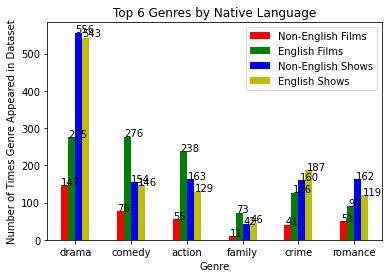

In [75]:
ax2=total_genre.plot.bar(rot=0,color=['r','g','b','y'])
plt.xlabel('Genre')
plt.ylabel('Number of Times Genre Appeared in Dataset')
plt.title('Top 6 Genres by Native Language')

for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


